In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(1)
# training set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y': [0]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y': [1]*50})
print(dataset_0_1)
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y': [1]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y': [0]*50})
# dataset_1_1
train_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the train_data
# train_data = train_data.sample(frac = 1).reset_index(drop = True)
# train_data

          x1        x2  y
0   5.903165 -1.128848  1
1   2.605822 -0.750230  1
2   4.941859 -1.869520  1
3   4.672267 -2.583034  1
4   3.542134 -5.034171  1
5   5.733187 -3.198720  1
6   3.129412 -3.928968  1
7   5.266357 -4.649760  1
8   3.053472 -2.444929  1
9   2.501208 -4.126381  1
10  5.488328 -0.502167  1
11  3.929720 -0.542187  1
12  2.527999 -4.457290  1
13  3.929104 -5.334652  1
14  5.750233 -4.842224  1
15  3.320518 -3.002495  1
16  2.681027 -1.628486  1
17  3.425554 -4.750833  1
18  1.277026 -4.511799  1
19  3.067225 -0.889969  1
20  1.482990 -3.504908  1
21  5.312626 -2.299890  1
22  5.303618 -4.598003  1
23  1.963044 -5.388196  1
24  4.011616 -2.904858  1
25  5.173229 -3.137154  1
26  1.362457 -5.083970  1
27  4.261171 -2.269163  1
28  2.245939 -2.735939  1
29  2.370010 -2.075176  1
30  1.583470 -5.132727  1
31  2.881639 -1.490833  1
32  2.245288 -4.667705  1
33  4.255508 -2.883889  1
34  4.650361 -1.288224  1
35  1.520569 -5.866017  1
36  3.859544 -4.053825  1
37  1.175800

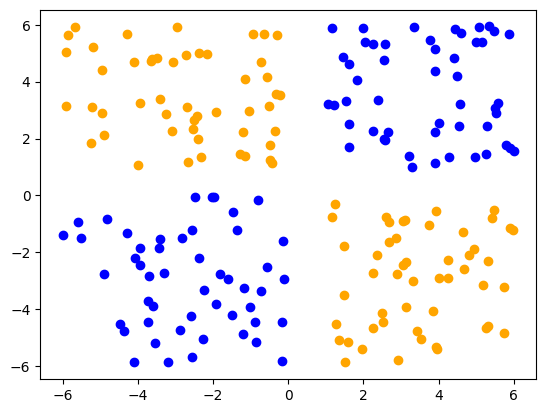

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_data['x1'][train_data['y'] == 0], train_data['x2'][train_data['y'] == 0], color = 'blue')
ax.scatter(train_data['x1'][train_data['y'] == 1], train_data['x2'][train_data['y'] == 1], color = 'orange')

In [9]:
np.random.seed(20)
# test set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y1': [1]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y1': [0]*50})
# dataset_0_1
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y1': [0]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y1': [1]*50})
# dataset_1_1
test_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the test_data
test_data = test_data.sample(frac= 1).reset_index(drop= True) 
test_data

,x1,x2,y1
0,2.677554,-0.116946,0
1,-0.740016,2.317857,0
2,-5.618369,1.146977,0
3,-3.585207,-3.556030,1
4,-0.500088,-5.729196,1
...,...,...,...
195,2.897847,-5.970784,0
196,2.459420,-5.740272,0
197,-0.321230,-4.103066,1
198,2.084982,2.387607,1


In [16]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [17]:
# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

Epoch 1/100, Train Loss: 0.6647, Test Loss: 0.7333
Epoch 2/100, Train Loss: 0.6486, Test Loss: 0.7504
Epoch 3/100, Train Loss: 0.6334, Test Loss: 0.7695
Epoch 4/100, Train Loss: 0.6172, Test Loss: 0.7902
Epoch 5/100, Train Loss: 0.6016, Test Loss: 0.8121
Epoch 6/100, Train Loss: 0.5857, Test Loss: 0.8349
Epoch 7/100, Train Loss: 0.5702, Test Loss: 0.8601
Epoch 8/100, Train Loss: 0.5545, Test Loss: 0.8862
Epoch 9/100, Train Loss: 0.5378, Test Loss: 0.9170
Epoch 10/100, Train Loss: 0.5200, Test Loss: 0.9496
Epoch 11/100, Train Loss: 0.5006, Test Loss: 0.9862
Epoch 12/100, Train Loss: 0.4802, Test Loss: 1.0286
Epoch 13/100, Train Loss: 0.4578, Test Loss: 1.0765
Epoch 14/100, Train Loss: 0.4337, Test Loss: 1.1255
Epoch 15/100, Train Loss: 0.4089, Test Loss: 1.1838
Epoch 16/100, Train Loss: 0.3831, Test Loss: 1.2457
Epoch 17/100, Train Loss: 0.3572, Test Loss: 1.3162
Epoch 18/100, Train Loss: 0.3310, Test Loss: 1.3960
Epoch 19/100, Train Loss: 0.3044, Test Loss: 1.4843
Epoch 20/100, Train L

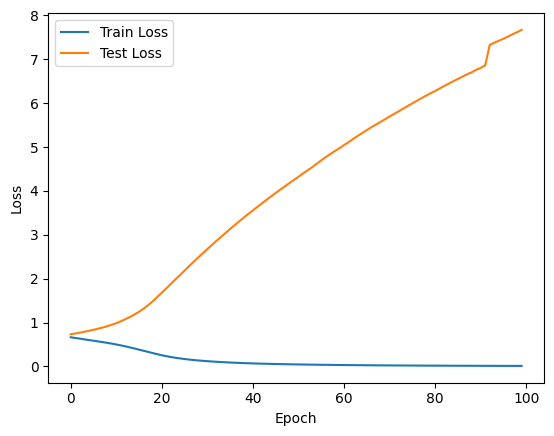

In [20]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Define features and target variable
X_train = train_data[['x1', 'x2']].values.astype(np.float32)
y_train = train_data['y'].values.reshape(-1, 1).astype(np.float32)
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)

# Create DataLoader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MLP(input_size=2, hidden_size=8)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
train_losses = []
test_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot training and test losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()